# Save and load results as HDF5 files

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [2]:
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                               grad=sp.optimize.rosen_der, 
                               hess=sp.optimize.rosen_hess)


dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Run optimization

In [3]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# Run optimizaitons
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts)

In [4]:
result.optimize_result.list

[{'id': '11',
  'x': array([1.00000001, 0.99999998, 1.00000004, 1.        , 1.00000001,
         1.00000005, 1.00000004, 1.00000011, 1.00000015, 1.00000033]),
  'fval': 3.1110020318440338e-12,
  'grad': array([ 2.04416227e-05, -4.62517010e-05,  5.17164826e-05, -2.23436189e-05,
         -1.42031708e-05,  3.49871869e-05, -2.46137940e-05,  3.46367916e-05,
         -2.38723656e-05,  4.92148744e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 75,
  'n_grad': 75,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([1.00000001, 0.99999998, 1.00000004, 1.        , 1.00000001,
         1.00000005, 1.00000004, 1.00000011, 1.00000015, 1.00000033]),
  'fval0': 52713.029945876675,
  'trace': None,
  'exitflag': 0,
  'time': 0.015774250030517578,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '19',
  'x': array([1.00000007, 1.00000006, 1.00000005, 0.99999996, 0.99999993,
         0.99999991, 0.99999994, 1.00000005, 0.99999997, 0.99999995]),
  'fval':

## Plot results

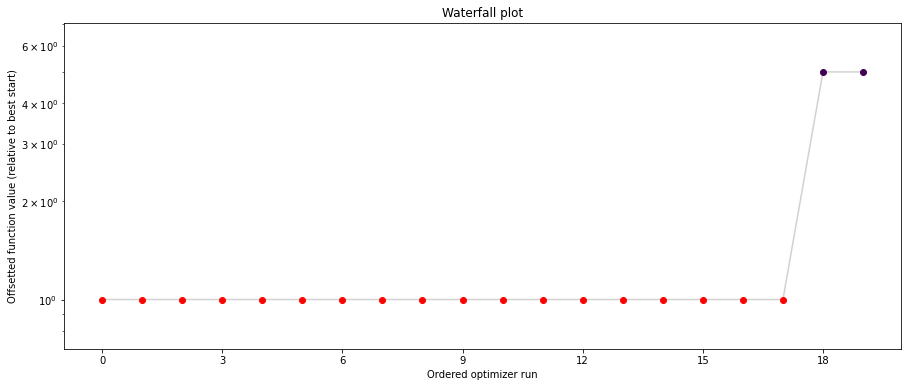

In [5]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Save optimization result as HDF5 file

In [6]:
fn = tempfile.mktemp(".hdf5")

# Write result
hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

# Write problem
hdf5_writer = save_to_hdf5.ProblemHDF5Writer(fn)
hdf5_writer.write(problem)

In [7]:
# Read result and problem
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

In [8]:
result.optimize_result.list

[{'id': '11',
  'x': array([1.00000001, 0.99999998, 1.00000004, 1.        , 1.00000001,
         1.00000005, 1.00000004, 1.00000011, 1.00000015, 1.00000033]),
  'fval': 3.1110020318440338e-12,
  'grad': array([ 2.04416227e-05, -4.62517010e-05,  5.17164826e-05, -2.23436189e-05,
         -1.42031708e-05,  3.49871869e-05, -2.46137940e-05,  3.46367916e-05,
         -2.38723656e-05,  4.92148744e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 75,
  'n_grad': 75,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([1.00000001, 0.99999998, 1.00000004, 1.        , 1.00000001,
         1.00000005, 1.00000004, 1.00000011, 1.00000015, 1.00000033]),
  'fval0': 52713.029945876675,
  'trace': None,
  'exitflag': 0,
  'time': 0.015774250030517578,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '19',
  'x': array([1.00000007, 1.00000006, 1.00000005, 0.99999996, 0.99999993,
         0.99999991, 0.99999994, 1.00000005, 0.99999997, 0.99999995]),
  'fval':

## Plot results

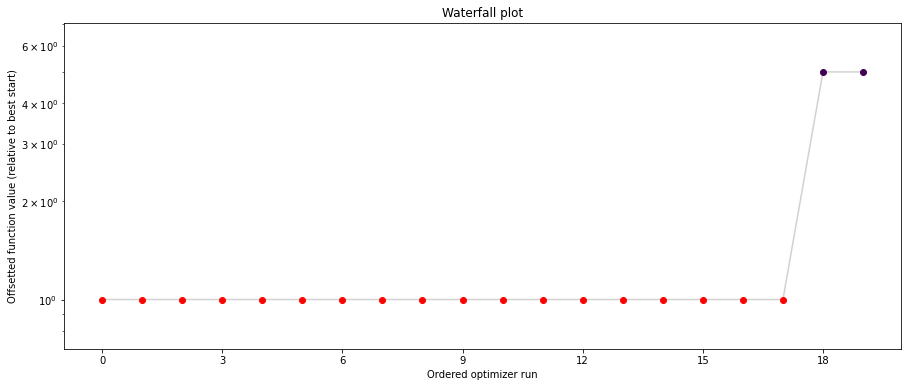

In [9]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

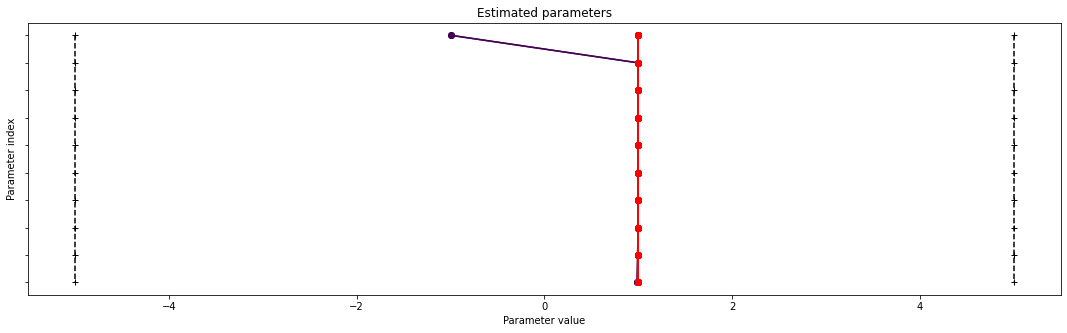

In [10]:
pypesto.visualize.parameters(result,
                            balance_alpha=False)